In [1]:
# 忽略不必要的警告
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas_datareader.data as web
import pandas as pd
import datetime

In [4]:
start = datetime.datetime(2018, 1, 1) # 指定开始时间
end = datetime.datetime.now() # 指定结束时间

# 获取股 招商银行 的股票数据
SS600036 = web.DataReader('600036.SS', 'yahoo', start, end)
SS600036

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2018-01-02,30.059999,29.020000,29.020000,29.620001,67591307.0,27.933558
2018-01-03,30.480000,29.639999,29.740000,29.969999,71850339.0,28.263630
2018-01-04,30.360001,29.400000,30.280001,29.650000,51686593.0,27.961849
2018-01-05,30.250000,29.459999,29.870001,30.100000,47990820.0,28.386229
2018-01-08,30.049999,29.309999,29.920000,29.469999,65857890.0,27.792097
...,...,...,...,...,...,...
2020-03-09,34.880001,34.180000,34.880001,34.180000,96659166.0,34.180000
2020-03-10,34.939999,34.080002,34.189999,34.680000,66829810.0,34.680000
2020-03-11,34.990002,34.410000,34.759998,34.450001,56655064.0,34.450001


In [5]:
SS600036.to_csv("SS600036.csv")

In [28]:
df = pd.read_csv("SS600036.csv")

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 531 entries, 0 to 530
Data columns (total 7 columns):
Date         531 non-null object
High         531 non-null float64
Low          531 non-null float64
Open         531 non-null float64
Close        531 non-null float64
Volume       531 non-null float64
Adj Close    531 non-null float64
dtypes: float64(6), object(1)
memory usage: 29.2+ KB


In [30]:
df.isnull().values.sum()

0

In [31]:
#计算跌涨幅
df['Range'] = df['Close']  - df['Close'].shift(1)

In [32]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.rcParams['font.sans-serif']=['SimHei']
#⽤来正常显示中⽂标签
plt.rcParams['axes.unicode_minus']=False 
#⽤来正常显示负号 #有中⽂出现的情况，需要u'内容'

In [36]:
#调整数据索引
df.index = df.Date

df  =  df[['High', 'Low', 'Open', 'Close', 'Volume', 'Adj Close', 'Range']]

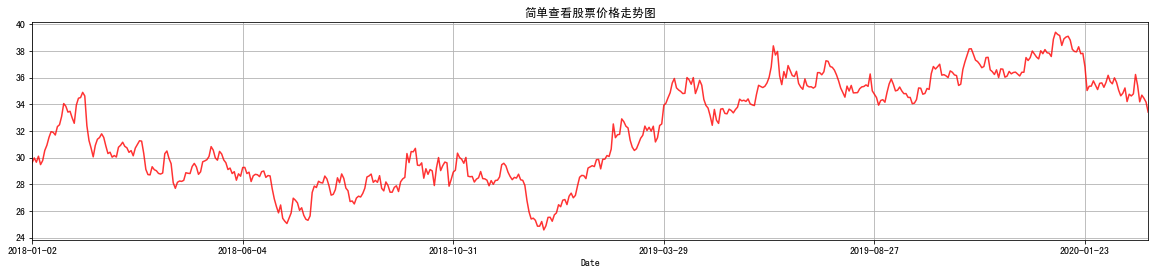

In [46]:
#简单查看股票价格走势图
df['Close'].plot(figsize=(20,4),
                 color = 'r',
                 alpha = 0.8,
                 grid = True,
                 rot = 0,
                 title='简单查看股票价格走势图')

(<matplotlib.collections.LineCollection at 0x12bc5aed0>,
 <matplotlib.collections.PolyCollection at 0x12bf00b10>)

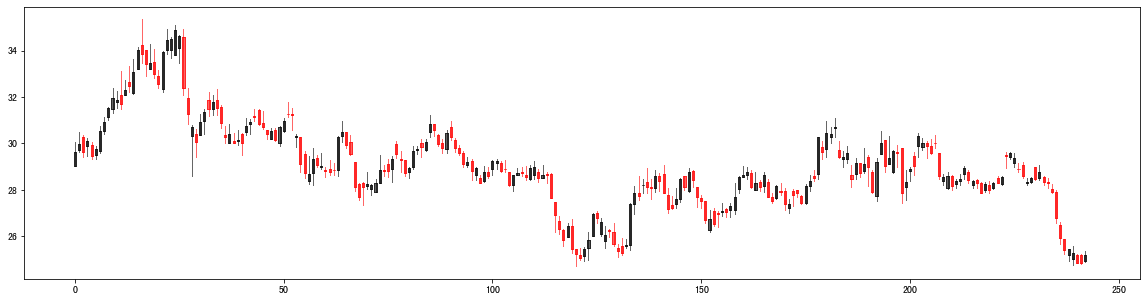

In [54]:
from mpl_finance import candlestick2_ohlc
y2018 = df['2018-01-01':'2018-12-31']

fig, ax = plt.subplots(figsize=(20,5))
candlestick2_ohlc(ax, y2018.Open, 
                  y2018.High, 
                  y2018.Low, 
                  y2018.Close, 
                  width=0.5, 
                  alpha =0.6)

In [57]:
#补充  使用Pycharts 工具包进行画K线图
# 导入pyecharts工具包，用pe作为简写
import pyecharts as pe
y2018 = df['2018-01-01':'2018-12-31']

# 提取x轴数据，即交易日期，同时转换为字符串形式
x = df.index.astype('str')

# 提取y轴数据，即绘制股票k线所必须的4个价格字段
y = y2018[['Open','Close','Low','High']].values

# 创建k线图对象，并设置大标题
kline = pe.Kline('2018_K线图_SS600036')

# 绘制图表
kline.add('日K', x, y,                          #图例名称，x轴数据，y轴数据
          is_datazoom_show=True,                #使用区域缩放组件
          datazoom_range=[97,100],              #设置区域缩放的范围，这里设置为末尾3%的k线数据
          mark_point=['max','min'],             #标记可视范围内开盘价最大值，最小值
          is_xaxislabel_align = True,           #设置x轴刻度与标签对齐
          tooltip_trigger ='axis',              #坐标轴触发弹窗提示
          tooltip_axispointer_type ='shadow')   #设置tooltip指示器

AttributeError: module 'pyecharts' has no attribute 'Kline'

In [58]:
'''
Min-Max 标准化是最常用的规范化手段
'''

'\nMin-Max 标准化是最常用的规范化手段\n'

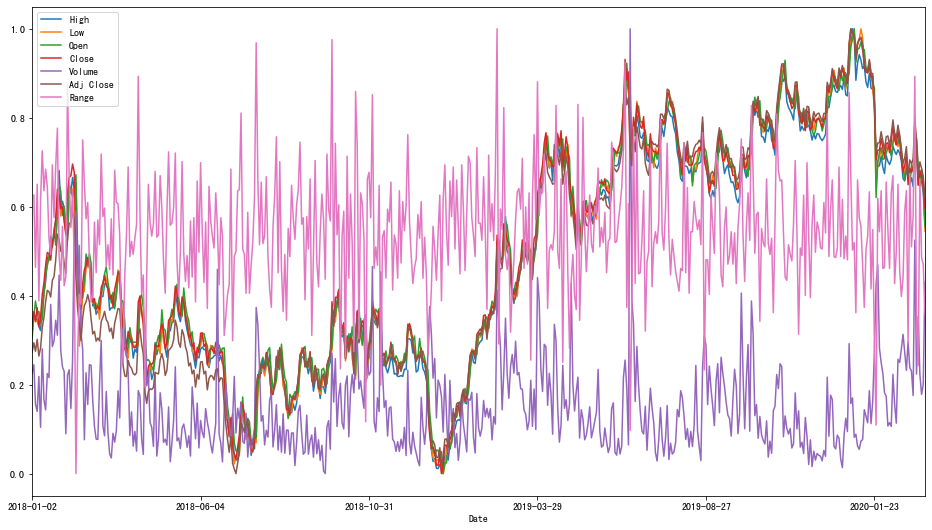

In [62]:
df_min_max = (df - df.min()) / (df.max() - df.min())
df_min_max.plot(figsize=(16, 9))

In [68]:
#计算5日线和10日线

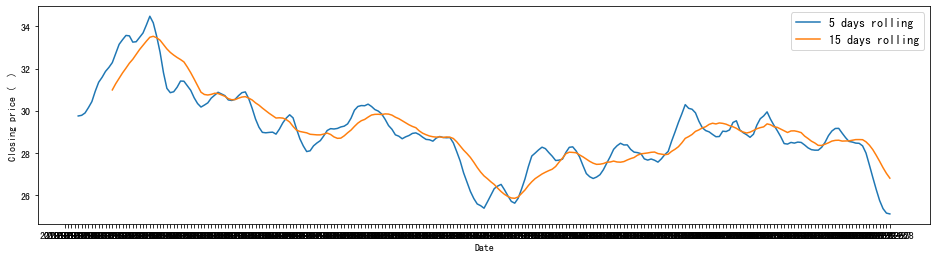

In [71]:
y2018_close = y2018.Close
short_rolling = y2018_close.rolling(window=5).mean()
long_rolling = y2018_close.rolling(window=15).mean()

fig, ax = plt.subplots(figsize=(16,4))
ax.plot(short_rolling.index, short_rolling, label='5 days rolling')
ax.plot(long_rolling.index, long_rolling, label='15 days rolling')
ax.set_xlabel('Date')
ax.set_ylabel('Closing price (¥)')
ax.legend(fontsize='large')

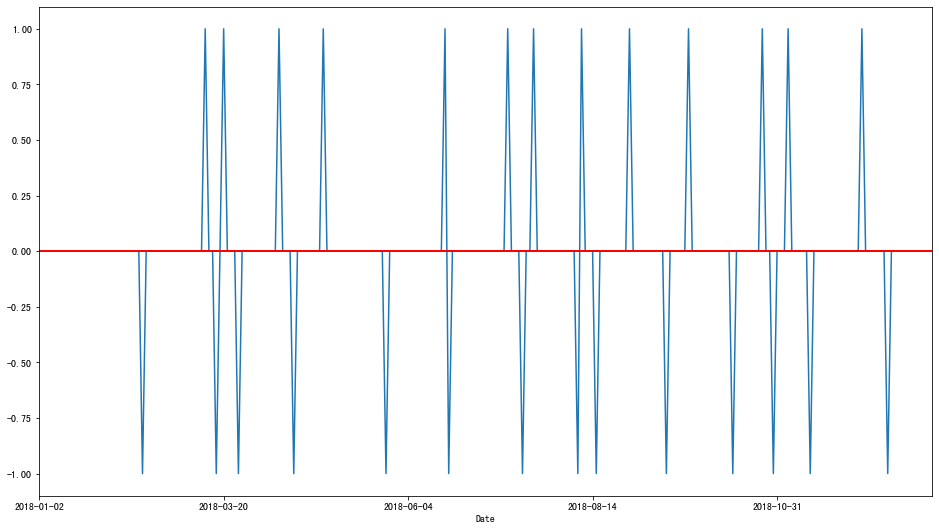

In [72]:
fig, ax = plt.subplots(figsize=(16,9))

short_long = np.sign(short_rolling - long_rolling)
buy_sell = np.sign(short_long - short_long.shift(1))
buy_sell.plot(ax=ax)
ax.axhline(y=0, color='red', lw=2)

In [73]:
buy_sell[buy_sell == 1]

Date
2018-03-13    1.0
2018-03-20    1.0
2018-04-12    1.0
2018-05-02    1.0
2018-06-19    1.0
2018-07-12    1.0
2018-07-23    1.0
2018-08-09    1.0
2018-08-28    1.0
2018-09-19    1.0
2018-10-25    1.0
2018-11-05    1.0
2018-12-03    1.0
Name: Close, dtype: float64

In [74]:
buy_sell[buy_sell == -1]

Date
2018-02-09   -1.0
2018-03-16   -1.0
2018-03-26   -1.0
2018-04-18   -1.0
2018-05-25   -1.0
2018-06-20   -1.0
2018-07-18   -1.0
2018-08-08   -1.0
2018-08-15   -1.0
2018-09-11   -1.0
2018-10-15   -1.0
2018-10-30   -1.0
2018-11-13   -1.0
2018-12-12   -1.0
Name: Close, dtype: float64

In [75]:
#使用指标来绘制热力图

In [77]:
data = pd.merge(short_rolling,long_rolling,left_index=True,right_index=True)

In [78]:
data

,Close_x,Close_y
Date,,
2018-01-02,NaN,NaN
2018-01-03,NaN,NaN
2018-01-04,NaN,NaN
2018-01-05,NaN,NaN
2018-01-08,29.762000,NaN
...,...,...
2018-12-24,26.286000,27.902000
2018-12-25,25.762000,27.616667
2018-12-26,25.378000,27.315333


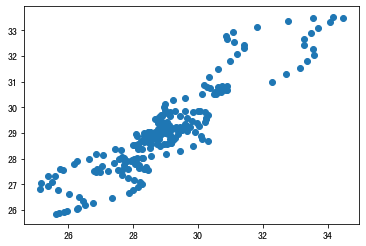

In [81]:
plt.scatter(data['Close_x'],data['Close_y'])

In [82]:
#加性模型预测Prophet

In [84]:
data = y2018['Close'].reset_index()
data = data.rename(columns={'Date': 'ds', 'Close': 'y'})

In [85]:
import fbprophet
model = fbprophet.Prophet(changepoint_prior_scale=0.05, daily_seasonality=True) # 定义模型
model.fit(data) # 训练模型

ERROR:fbprophet:Importing plotly failed. Interactive plots will not work.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


In [86]:
forecast_df = model.make_future_dataframe(periods=365, freq='D') # 生成需预测序列
forecast = model.predict(forecast_df) # 模型预测

TypeError: 'str' object is not callable

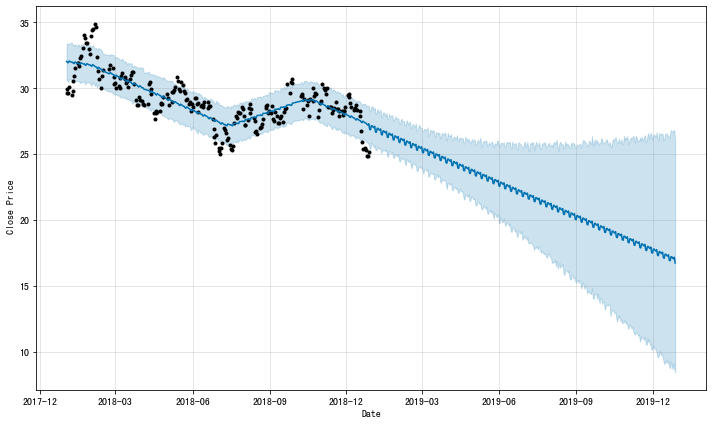

In [87]:
model.plot(forecast, xlabel = 'Date', ylabel = 'Close Price ¥'); # 绘制预测图
plt.title('Close Price of 600036.SS');

In [88]:
def plot(m, fcst, ax=None, uncertainty=True, plot_cap=True, xlabel='ds', ylabel='y', plot_color='#0072B2'):
    """Plot the Prophet forecast.
    Parameters
    ----------
    m: Prophet model.
    fcst: pd.DataFrame output of m.predict.
    ax: Optional matplotlib axes on which to plot.
    uncertainty: Optional boolean to plot uncertainty intervals.
    plot_cap: Optional boolean indicating if the capacity should be shown
        in the figure, if available.
    xlabel: Optional label name on X-axis
    ylabel: Optional label name on Y-axis
    Returns
    -------
    A matplotlib figure.
    """
    if ax is None:
        fig = plt.figure(facecolor='w', figsize=(10, 6))
        ax = fig.add_subplot(111)
    else:
        fig = ax.get_figure()
    fcst_t = fcst['ds'].dt.to_pydatetime()
    ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.')
    ax.plot(fcst_t, fcst['yhat'], ls='-', c=plot_color)
    if 'cap' in fcst and plot_cap:
        ax.plot(fcst_t, fcst['cap'], ls='--', c='k')
    if m.logistic_floor and 'floor' in fcst and plot_cap:
        ax.plot(fcst_t, fcst['floor'], ls='--', c='k')
    if uncertainty:
        ax.fill_between(fcst_t, fcst['yhat_lower'], fcst['yhat_upper'],
                        color=plot_color, alpha=0.2)
    ax.grid(True, which='major', c='gray', ls='-', lw=1, alpha=0.2)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    fig.tight_layout()
    return fig

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


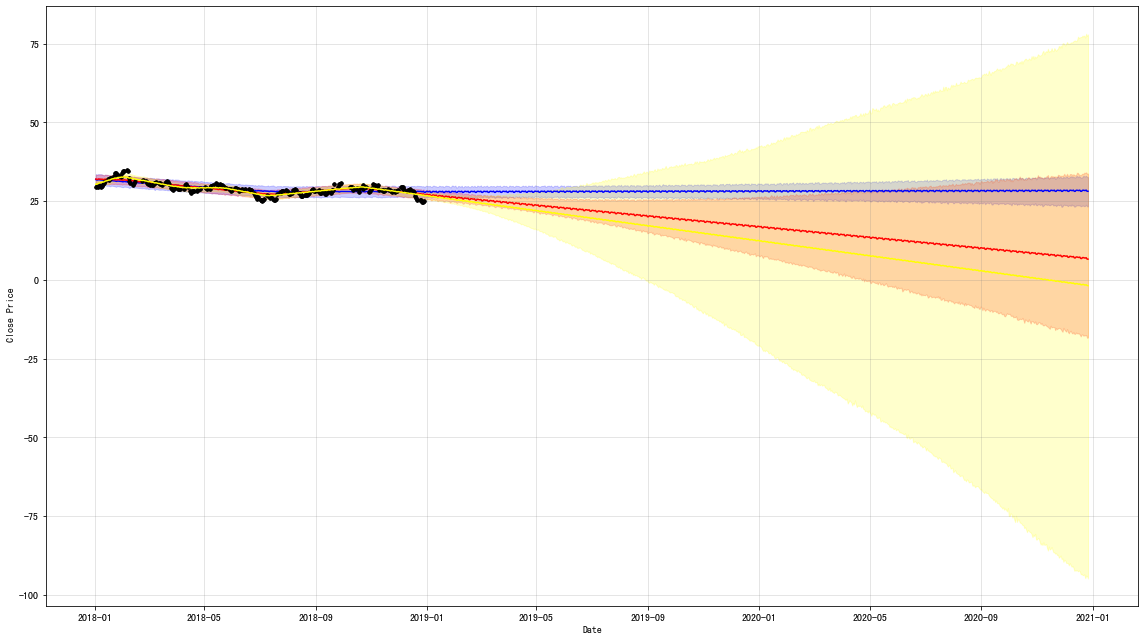

In [89]:
fig, ax = plt.subplots(figsize=(16,9))

# 此处代码运行时间较长，请耐心等待
for point, color in zip([0.01, 0.05, 0.1], ['blue', 'red', 'yellow']):
    temp_model = fbprophet.Prophet(changepoint_prior_scale=point, daily_seasonality=True)
    temp_model.fit(data)
    forecast = temp_model.make_future_dataframe(periods=365*2, freq='D') # 2 年
    forecast = temp_model.predict(forecast)
    plot(temp_model, forecast, ax=ax, xlabel = 'Date', ylabel = 'Close Price ¥', plot_color=color);

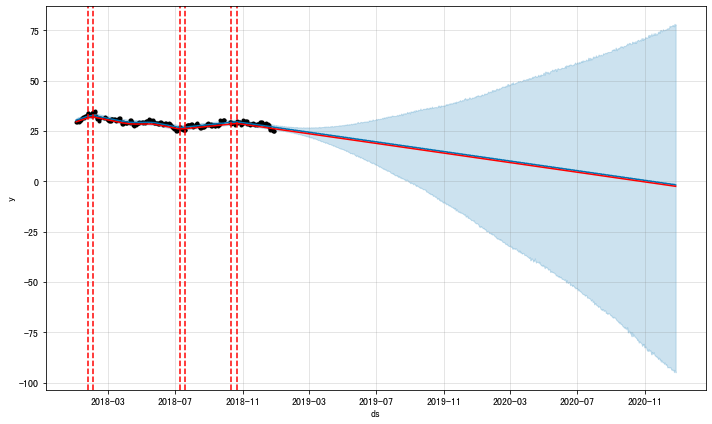

In [90]:
from fbprophet.plot import add_changepoints_to_plot

fig = model.plot(forecast) # 绘制预测图
a = add_changepoints_to_plot(fig.gca(), model, forecast) # 增加变化点

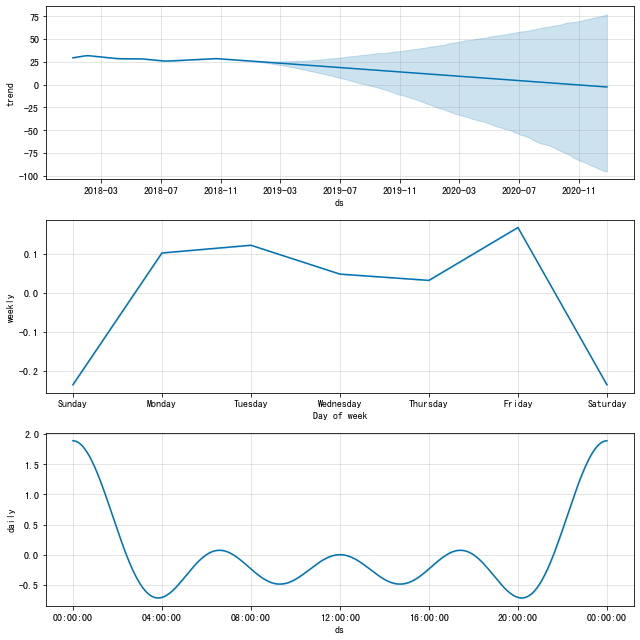

In [91]:
from fbprophet.plot import plot_components

model.plot_components(forecast); # 绘制多维度变化趋势图

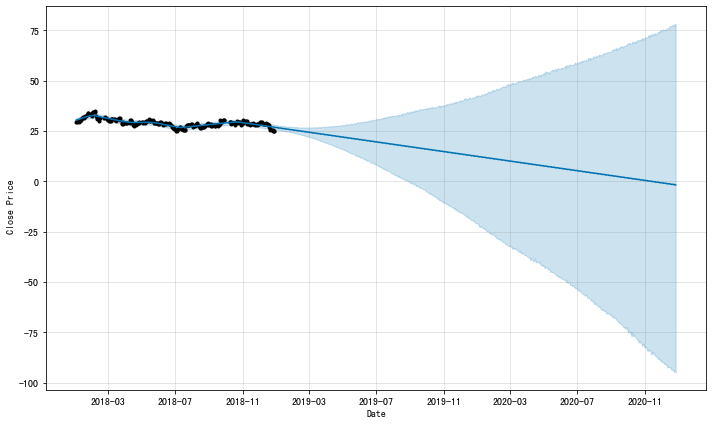

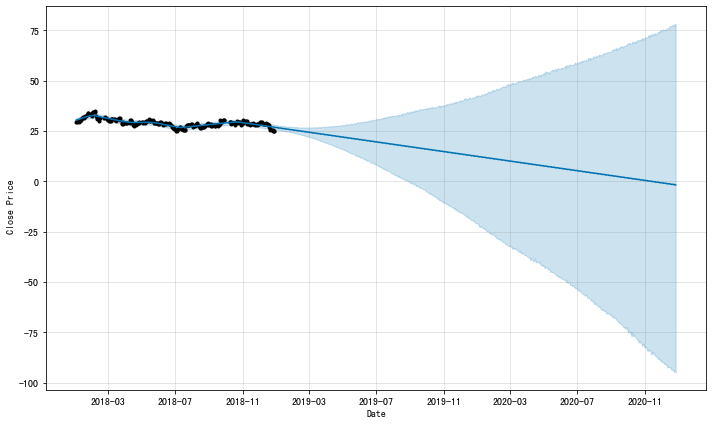

In [101]:
model.plot(forecast, xlabel = 'Date', ylabel = 'Close Price ¥')

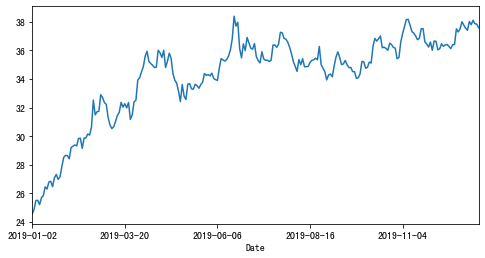

In [104]:
df['Close']['2019-01-01':'2019-12-31'].plot(figsize=(8,4))

In [ ]:
'''
除了基于加性模型的预测方法，还有两种预测思路：
建立基于 LSTM 神经网络的预测模型。
基于文本数据分析，分析信息对股票带来的影响，并将其添加到特征。
'''